In [1]:
import requests
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
url="https://engineering.careers360.com/colleges/ranking"

In [3]:
page=requests.get(url)
print(page)

<Response [200]>


In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/>
<meta content="LGYIP8lGL_sS1s8J67ez2TByaFYHe22sDZW7IiqhXB4" name="google-site-verification"/>
<meta content="658BD2BEC58D06790B07B5BC052DEAC6" name="msvalidate.01"/>
<title>Top Engineering Colleges in India 2025 - Rank, Brochure, Compare Colleges</title><meta content="Top Engineering Colleges in India 2025 - Rank, Brochure, Compare Colleges" name="name"/><meta content="Top Engineering Colleges in India 2025 - Careers360 brings a list of the best Engineering Colleges in India based on extensive research parameters." name="description"/><link href="https://engineering.careers360.com/colleges/ranking" rel="canonical"/><meta content="colleges list" property="og:type"/><meta content="colleges/ranking" property="og:url"/><meta content="Top Engineering Colleges in India 2025 - Rank, Bro

In [5]:
nirf_ranks = []

for card in soup.find_all(class_="tupple"):
    nirf_tag = card.select_one("div.tupple_top_block_left > div > strong")
    nirf_text = nirf_tag.text.strip() if nirf_tag else "0"
    nirf_rank = int(re.search(r'\d+', nirf_text).group()) if re.search(r'\d+', nirf_text) else 0
    nirf_ranks.append(nirf_rank)

print("NIRF Rankings:", nirf_ranks)


NIRF Rankings: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [6]:
college_names = []

for card in soup.find_all(class_="tupple"):
    college_name = card.select_one("div.tupple_right_block.d-none.d-md-block > h3 > a")
    college_name_text = college_name.text.strip() if college_name else "College name not found"
    college_names.append(college_name_text)

print("College Names:", college_names)

College Names: ['IIT Madras (IITM) - Indian Institute of Technology Madras', 'IIT Delhi - Indian Institute of Technology Delhi', 'IIT Bombay - Indian Institute of Technology Bombay', 'IIT Kanpur - Indian Institute of Technology Kanpur', 'IIT Kharagpur - Indian Institute of Technology Kharagpur', 'IIT Roorkee - Indian Institute of Technology Roorkee', 'IIT Guwahati (IITG) - Indian Institute of Technology Guwahati', 'IIT Hyderabad - Indian Institute of Technology Hyderabad', 'NIT Trichy - National Institute of Technology Tiruchirappalli', 'IIT BHU - Indian Institute of Technology Banaras Hindu University Varanasi', 'VIT Vellore - Vellore Institute of Technology, Vellore', 'Jadavpur University, Kolkata', 'SRM University Chennai - SRM Institute of Science and Technology, Chennai', 'Anna University, Chennai', 'IIT ISM Dhanbad - Indian Institute of Technology Indian School of Mines Dhanbad', 'IIT Indore - Indian Institute of Technology Indore', 'NIT Surathkal (NITK) - National Institute of T

In [7]:
# Function to convert fee text to numeric value
def parse_fee(fee_text):
    if pd.isna(fee_text):  # Handle NaN values
        return np.nan
    fee_text = fee_text.strip().replace('₹', '').replace(',', '')
    
    # Handle ranges like "30.45 - 1.29 Lakhs"
    if '-' in fee_text:
        parts = fee_text.split('-')
        # Convert each part of the range and calculate the average
        values = [parse_fee(part.strip()) for part in parts]
        return sum(values) / len(values) if all(v is not None for v in values) else np.nan

    if 'K' in fee_text:
        return float(fee_text.replace('K', '').strip()) * 1000
    elif 'Lakhs' in fee_text:
        return float(fee_text.replace('Lakhs', '').strip()) * 100000
    else:
        try:
            return float(fee_text)  # In case the fee is already numeric
        except ValueError:
            return np.nan  # Handle unexpected cases gracefully

# Lists to hold the parsed fees
mtech_fees = []
btech_fees = []

# Assuming `soup` contains the HTML content of the page
for card in soup.find_all(class_="tupple"):
    # M.Tech Fee
    mtech_fee_element = card.select_one("div.snippet_block.border_style > ul:nth-child(1) > li:nth-child(2)")
    mtech_fee_text = mtech_fee_element.text.strip().replace('Fees : ', '') if mtech_fee_element else np.nan
    mtech_fees.append(parse_fee(mtech_fee_text))

    # B.Tech Fee
    btech_fee_element = card.select_one("div.snippet_block.border_style > ul:nth-child(2) > li:nth-child(2)")
    btech_fee_text = btech_fee_element.text.strip().replace('Fees : ', '') if btech_fee_element else np.nan
    btech_fees.append(parse_fee(btech_fee_text))

print("M.Tech Fees (in numeric):", mtech_fees)
print("B.Tech Fees (in numeric):", btech_fees)

M.Tech Fees (in numeric): [30450.0, 102000.0, 95700.0, 72965.0, 45850.0, 55100.0, 53150.0, 107500.0, 198000.0, 270690.0, 721000.0, nan, 1037500.0, 88860.0, 422500.0, 156000.0, 245500.0, nan, 278000.0, 699000.0, 234500.0, nan, 346000.0, 70500.0, 248145.0, 906500.0, 256000.0, 168000.0, 1758500.0, 1344000.0, 77550.0, 985000.0, 21500.0, 188000.0, 912500.0, 800000.0, 1491000.0, nan, 217000.0, 225999.99999999997, nan, 2088500.0, 198000.0, 314000.0, 227999.99999999997, 120000.0, 1800000.0, 434000.0, 165500.0, 1025000.0]
B.Tech Fees (in numeric): [858000.0, 858000.0, nan, nan, nan, nan, 853999.9999999999, 908000.0, nan, nan, 393500.0, nan, 685000.0, nan, nan, 991000.0, 576000.0, 867000.0, 628000.0, 2232000.0, 848000.0, 112999.99999999999, 1700000.0, nan, 623000.0, nan, 538000.0, nan, 348000.0, 420000.0, 863000.0000000001, 257000.0, nan, 917500.0, 272500.0, 141000.0, 551000.0, 753000.0, nan, 600000.0, 389000.0, 518000.0, nan, 625000.0, 658000.0, 200000.0, nan, nan, nan, 360000.0]


In [8]:
# Try to print out div elements related to courses
for card in soup.find_all("div", class_="course_list_container"):  # Replace with the actual class name for courses
    course_items = card.find_all("div", class_="course_item")  # Replace with the actual class for course items
    if course_items:
        mtech_courses.append(course_items[0].text.strip())  # Assuming 1st div is M.Tech
        btech_courses.append(course_items[1].text.strip())  # Assuming 2nd div is B.Tech

    else:
        mtech_courses.append("Not listed")
        btech_courses.append("Not listed")

In [9]:
ratings = []

for card in soup.find_all(class_="tupple"):
    rating_element = card.select_one("div.tupple_right_block.d-none.d-md-block > div:nth-child(3) > div > span.star_text > b")
    rating_text = rating_element.text.strip() if rating_element else "0"
    rating = float(re.search(r'\d+(\.\d+)?', rating_text).group()) if re.search(r'\d+(\.\d+)?', rating_text) else 0.0
    ratings.append(rating)

print("Ratings:", ratings)
print(len(ratings))

Ratings: [4.7, 4.6, 4.6, 4.4, 4.7, 4.4, 4.3, 4.6, 4.4, 4.6, 4.4, 4.6, 4.3, 4.8, 4.3, 4.6, 4.4, 4.4, 4.6, 4.5, 4.6, 4.5, 4.3, 4.5, 4.3, 4.1, 4.5, 4.4, 4.3, 4.1, 4.4, 4.3, 4.7, 4.7, 4.4, 4.0, 4.3, 4.2, 4.2, 4.3, 4.5, 4.1, 4.3, 4.1, 4.0, 4.6, 4.5, 4.2, 4.3, 4.4]
50


In [10]:
def extract_course_count(course_text):
    # Search for numbers in the text
    match = re.search(r'\d+', course_text)
    return int(match.group()) if match else np.nan  # Return numeric value or NaN if not found

# Scrape the courses
mtech_courses = []
btech_courses = []

url = "https://engineering.careers360.com/colleges/ranking?sort_by=1&stream=1&page=1"  # Example URL for scraping

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

for card in soup.find_all("div", class_="tupple"):
    course_list = card.find_all("ul")  # Extract all ul elements for courses
    print(course_list)  # Debugging step: To see what courses are being captured

    # Initialize variables to hold the first course count for M.Tech and B.Tech
    mtech_course_count = np.nan
    btech_course_count = np.nan

    if len(course_list) > 0:  # Ensure there are course lists
        mtech_ul = course_list[0]  # First ul is assumed to be for M.Tech
        mtech_items = mtech_ul.find_all("li")
        for item in mtech_items:
            course_text = item.text.strip()  # Get the text for each item
            mtech_course_count = extract_course_count(course_text)  # Extract numeric course count
            if mtech_course_count is not np.nan:  # Only keep the first found value
                break

    if len(course_list) > 1:  # If there's a second ul for B.Tech courses
        btech_ul = course_list[1]  # Second ul is assumed to be for B.Tech
        btech_items = btech_ul.find_all("li")
        for item in btech_items:
            course_text = item.text.strip()  # Get the text for each item
            btech_course_count = extract_course_count(course_text)  # Extract numeric course count
            if btech_course_count is not np.nan:  # Only keep the first found value
                break

    # Append the first numeric course count or NaN
    mtech_courses.append(mtech_course_count)
    btech_courses.append(btech_course_count)

    # Optional: Print the courses for debugging
    print("M.Tech Courses:", mtech_course_count)
    print("B.Tech Courses:", btech_course_count)

# Now print the final lists of courses for all colleges
print("Final M.Tech Courses:", mtech_courses)
print("Final B.Tech Courses:", btech_courses)


[<ul class="snippet_list"><li><a href="https://www.careers360.com/university/indian-institute-of-technology-madras/courses/me-mtech-idpg">M.E /M.Tech.<span> <!-- -->(<!-- -->31<!-- --> <!-- -->Courses<!-- -->)</span></a> </li><li><span class="gray_text">Fees : </span> <!-- -->₹<!-- -->30.45 K<!-- --> </li></ul>, <ul class="snippet_list"><li><a href="https://www.careers360.com/university/indian-institute-of-technology-madras/courses/be-btech-idpg">B.E /B.Tech<span> <!-- -->(<!-- -->11<!-- --> <!-- -->Courses<!-- -->)</span></a></li><li><span class="gray_text">Fees : </span> <!-- -->₹<!-- -->8.58 Lakhs<!-- --> </li></ul>, <ul class="links_list"><li><a href="https://www.careers360.com/university/indian-institute-of-technology-madras/admission">Admissions</a></li><li><a href="https://www.careers360.com/university/indian-institute-of-technology-madras/placement">Placements</a></li><li><a href="https://www.careers360.com/university/indian-institute-of-technology-madras/courses">Courses</a></

In [11]:
brochures_downloaded = []

for card in soup.find_all(class_="tupple"):
    brochure_text = card.select_one("div.d-none.d-md-block > div > div.student_appyTextDesktop")
    brochure_number = int(re.search(r'\d+', brochure_text.text.strip()).group()) if brochure_text and re.search(r'\d+', brochure_text.text.strip()) else 0
    brochures_downloaded.append(brochure_number)

print("Brochures Downloaded:", brochures_downloaded)


Brochures Downloaded: [1000, 1500, 2000, 600, 1000, 600, 300, 300, 600, 300, 1000, 600, 2000, 300, 100, 100, 600, 100, 300, 600, 300, 100, 300, 1500, 300, 600, 600, 100, 600, 2000, 100, 600, 1500, 100, 300, 300, 1000, 300, 300, 100, 600, 300, 300, 300, 300, 300, 600, 300, 300, 600]


In [12]:
tupple_blocks = soup.find_all("div", class_="tupple")

# Initialize a list to store reviews
reviews = []

# Loop through each "tupple" block to extract reviews
for block in tupple_blocks:
    # Find the "review_text" element within the tupple block
    review_element = block.find("span", class_="review_text")
    
    # Extract text and handle missing elements
    review_text = review_element.text.strip() if review_element else "0"
    
    # Use regex to extract the number
    match = re.search(r'\d+', review_text)
    if match:
        reviews.append(int(match.group()))  # Append the number as an integer
    else:
        reviews.append(0)  # Append 0 if no number is found

# Print extracted reviews
print("Extracted reviews:", reviews)

# Calculate the total and count of reviews
total_reviews = sum(reviews)
print("Total reviews:", total_reviews)
print("Number of tupple blocks with reviews:", len(reviews))

Extracted reviews: [117, 277, 161, 160, 326, 409, 187, 27, 305, 161, 797, 229, 734, 43, 204, 36, 95, 21, 341, 265, 142, 126, 121, 403, 152, 151, 436, 68, 334, 398, 27, 829, 417, 54, 131, 35, 564, 183, 123, 164, 25, 107, 276, 168, 74, 65, 34, 215, 141, 1149]
Total reviews: 12007
Number of tupple blocks with reviews: 50


In [13]:
max_length = max(len(nirf_ranks), len(college_names), len(mtech_fees), len(btech_fees), 
                 len(ratings), len(reviews), len(mtech_courses), len(btech_courses), len(brochures_downloaded))

# Pad the shorter lists with None or NaN
nirf_ranks.extend([None] * (max_length - len(nirf_ranks)))
college_names.extend([None] * (max_length - len(college_names)))
mtech_fees.extend([None] * (max_length - len(mtech_fees)))
btech_fees.extend([None] * (max_length - len(btech_fees)))
ratings.extend([None] * (max_length - len(ratings)))
reviews.extend([None] * (max_length - len(reviews)))
mtech_courses.extend([None] * (max_length - len(mtech_courses)))
btech_courses.extend([None] * (max_length - len(btech_courses)))
brochures_downloaded.extend([None] * (max_length - len(brochures_downloaded)))

In [14]:
df = pd.DataFrame({
    "NIRF Ranking": nirf_ranks,
    "College Name": college_names,
    "M.Tech Fee": mtech_fees,
    "B.Tech Fee": btech_fees,
    "Rating": ratings,
    "Reviews": reviews,
    "M.Tech Courses": mtech_courses,
    "B.Tech Courses": btech_courses,
    "Brochures Downloaded": brochures_downloaded
})

print(df.head())

   NIRF Ranking                                       College Name  \
0             1  IIT Madras (IITM) - Indian Institute of Techno...   
1             2   IIT Delhi - Indian Institute of Technology Delhi   
2             3  IIT Bombay - Indian Institute of Technology Bo...   
3             4  IIT Kanpur - Indian Institute of Technology Ka...   
4             5  IIT Kharagpur - Indian Institute of Technology...   

   M.Tech Fee  B.Tech Fee  Rating  Reviews  M.Tech Courses  B.Tech Courses  \
0     30450.0    858000.0     4.7      117              31              11   
1    102000.0    858000.0     4.6      277              48              14   
2     95700.0         NaN     4.6      161              42              17   
3     72965.0         NaN     4.4      160              40              12   
4     45850.0         NaN     4.7      326              62              21   

   Brochures Downloaded  
0                  1000  
1                  1500  
2                  2000  
3     

In [15]:
df

NIRF Ranking                                       College Name  \
0              1  IIT Madras (IITM) - Indian Institute of Techno...   
1              2   IIT Delhi - Indian Institute of Technology Delhi   
2              3  IIT Bombay - Indian Institute of Technology Bo...   
3              4  IIT Kanpur - Indian Institute of Technology Ka...   
4              5  IIT Kharagpur - Indian Institute of Technology...   
5              6  IIT Roorkee - Indian Institute of Technology R...   
6              7  IIT Guwahati (IITG) - Indian Institute of Tech...   
7              8  IIT Hyderabad - Indian Institute of Technology...   
8              9  NIT Trichy - National Institute of Technology ...   
9             10  IIT BHU - Indian Institute of Technology Banar...   
10            11  VIT Vellore - Vellore Institute of Technology,...   
11            12                       Jadavpur University, Kolkata   
12            13  SRM University Chennai - SRM Institute of Scie...   
13            14                           Anna University, Chennai   
14            15  IIT ISM Dhanbad - Indian Institute of Technolo...   
15            16  IIT Indore - Indian Institute of Technology In...   
16            17  NIT Surathkal (NITK) - National Institute of T...   
17            18  IIT Gandhinagar (IIT GN) - Indian Institute of...   
18            19  NIT Rourkela - National Institute of Technolog...   
19            20  BITS Pilani - Birla Institute of Technology an...   
20            21  NIT Warangal - National Institute of Technolog...   
21            22  IIT Ropar (IIT-RPR) - Indian Institute of Tech...   
22            23             Amrita Vishwa Vidyapeetham, Coimbatore   
23            24    JMI New Delhi - Jamia Millia Islamia, New Delhi   
24            25  NIT Calicut - National Institute of Technology...   
25            26                 Siksha 'O' Anusandhan, Bhubaneswar   
26            27  DTU Delhi - Delhi Technological University, Delhi   
27            28  IIT Jodhpur - Indian Institute of Technology J...   
28            29  Thapar University - Thapar Institute of Engine...   
29            30                            Amity University, Noida   
30            31   IIT Mandi - Indian Institute of Technology Mandi   
31            32  Chandigarh University - Chandigarh University,...   
32            33   AMU Aligarh - Aligarh Muslim University, Aligarh   
33            34   IIT Patna - Indian Institute of Technology Patna   
34            35  KL University Guntur - Koneru Lakshmaiah Educa...   
35            36  Kalasalingam Academy of Research and Education...   
36            37  KIIT University - Kalinga Institute of Industr...   
37            38  SASTRA University Thanjavur - Shanmugha Arts S...   
38            39  VNIT Nagpur - Visvesvaraya National Institute ...   
39            40  NIT Silchar - National Institute of Technology...   
40            41  ICT Mumbai - Institute of Chemical Technology,...   
41            42                     UPES Dehradun - UPES, Dehradun   
42            43  MNIT Jaipur - Malaviya National Institute of T...   
43            44  NIT Durgapur - National Institute of Technolog...   
44            45  NIT Delhi - National Institute of Technology D...   
45            46  SSN College of Engineering - Sri Sivasubramani...   
46            47  IIIT Hyderabad - International Institute of In...   
47            48   BIT Mesra - Birla Institute of Technology, Mesra   
48            49  IIEST Shibpur - Indian Institute of Engineerin...   
49            50  LPU Jalandhar - Lovely Professional University...   

    M.Tech Fee  B.Tech Fee  Rating  Reviews  M.Tech Courses  B.Tech Courses  \
0      30450.0    858000.0     4.7      117              31              11   
1     102000.0    858000.0     4.6      277              48              14   
2      95700.0         NaN     4.6      161              42              17   
3      72965.0         NaN     4.4      160              40       

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NIRF Ranking          50 non-null     int64  
 1   College Name          50 non-null     object 
 2   M.Tech Fee            45 non-null     float64
 3   B.Tech Fee            32 non-null     float64
 4   Rating                50 non-null     float64
 5   Reviews               50 non-null     int64  
 6   M.Tech Courses        50 non-null     int64  
 7   B.Tech Courses        50 non-null     int64  
 8   Brochures Downloaded  50 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 3.6+ KB


In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Function to extract numeric value from fee text
def parse_fee(fee_text):
    if not fee_text:
        return None
    fee_text = fee_text.strip().replace('₹', '').replace(',', '')
    if '-' in fee_text:
        parts = fee_text.split('-')
        values = [parse_fee(part.strip()) for part in parts]
        return sum(values) / len(values) if all(v is not None for v in values) else None
    if 'K' in fee_text:
        return float(fee_text.replace('K', '').strip()) * 1000
    elif 'Lakhs' in fee_text:
        return float(fee_text.replace('Lakhs', '').strip()) * 100000
    try:
        return float(fee_text)
    except ValueError:
        return None

# Function to extract numeric value from course text
def extract_course_count(course_text):
    match = re.search(r'\d+', course_text)
    return int(match.group()) if match else None

# Base URL for scraping
base_url = "https://engineering.careers360.com/colleges/ranking?sort_by=1&stream=1&page={}"

# Initialize lists for the data
nirf_ranks = []
college_names = []
mtech_fees = []
btech_fees = []
ratings = []
reviews = []
mtech_courses = []
btech_courses = []
brochures_downloaded = []

# Iterate through pages
for page in range(1, 13):  # Adjust range for the number of pages available
    url = base_url.format(page)
    print(f"Scraping page {page}...")
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to fetch page {page}. Skipping...")
        continue

    soup = BeautifulSoup(response.content, 'html.parser')
    cards = soup.find_all(class_="tupple")
    if not cards:
        print(f"No data found on page {page}.")
        continue

    for card in cards:
        # NIRF Rank
        nirf_tag = card.select_one("div.tupple_top_block_left > div > strong")
        nirf_rank = int(re.search(r'\d+', nirf_tag.text.strip()).group()) if nirf_tag and re.search(r'\d+', nirf_tag.text.strip()) else 0
        nirf_ranks.append(nirf_rank)

        # College Name
        college_name_tag = card.select_one("div.tupple_right_block.d-none.d-md-block > h3 > a")
        college_names.append(college_name_tag.text.strip() if college_name_tag else "College name not found")

        # M.Tech Fee
        mtech_fee_element = card.select_one("div.snippet_block.border_style > ul:nth-child(1) > li:nth-child(2)")
        mtech_fees.append(parse_fee(mtech_fee_element.text.strip().replace('Fees : ', '')) if mtech_fee_element else None)

        # B.Tech Fee
        btech_fee_element = card.select_one("div.snippet_block.border_style > ul:nth-child(2) > li:nth-child(2)")
        btech_fees.append(parse_fee(btech_fee_element.text.strip().replace('Fees : ', '')) if btech_fee_element else None)

        # Ratings
        rating_element = card.select_one("div.tupple_right_block.d-none.d-md-block > div:nth-child(3) > div > span.star_text > b")
        if rating_element:
            rating_text = rating_element.text.strip()
            rating = float(rating_text.split('/')[0])
        else:
            rating = 0.0
        ratings.append(rating)

        # Reviews
        review_element = card.select_one("div.tupple_right_block.d-none.d-md-block > div:nth-child(3) > div > span.review_text > a")
        review_text = review_element.text.strip() if review_element else "0"
        reviews.append(int(re.search(r'\d+', review_text).group()) if re.search(r'\d+', review_text) else 0)

        # Courses
        course_list = card.find_all("ul")
        mtech_course_count = extract_course_count(course_list[0].text.strip()) if len(course_list) > 0 else None
        btech_course_count = extract_course_count(course_list[1].text.strip()) if len(course_list) > 1 else None
        mtech_courses.append(mtech_course_count)
        btech_courses.append(btech_course_count)

        # Brochures Downloaded
        brochure_text = card.select_one("div.d-none.d-md-block > div > div.student_appyTextDesktop")
        brochures_downloaded.append(int(re.search(r'\d+', brochure_text.text.strip()).group()) if brochure_text and re.search(r'\d+', brochure_text.text.strip()) else 0)

# Create a DataFrame
df = pd.DataFrame({
    "NIRF Ranking": nirf_ranks,
    "College Name": college_names,
    "M.Tech Fee": mtech_fees,
    "B.Tech Fee": btech_fees,
    "Rating": ratings,
    "Reviews": reviews,
    "M.Tech Courses": mtech_courses,
    "B.Tech Courses": btech_courses,
    "Brochures Downloaded": brochures_downloaded
})

# Save DataFrame to CSV
df.to_csv("college_ranking_data.csv", index=False)
print("Data has been successfully saved to 'college_ranking_data.csv'")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Data has been successfully saved to 'college_ranking_data.csv'


In [18]:
df=pd.read_csv('college_ranking_data.csv')

In [19]:
df

NIRF Ranking                                       College Name  \
0               1  IIT Madras (IITM) - Indian Institute of Techno...   
1               2   IIT Delhi - Indian Institute of Technology Delhi   
2               3  IIT Bombay - Indian Institute of Technology Bo...   
3               4  IIT Kanpur - Indian Institute of Technology Ka...   
4               5  IIT Kharagpur - Indian Institute of Technology...   
..            ...                                                ...   
595             0  IMSEC Ghaziabad - IMS Engineering College, Gha...   
596             0  Ellenki College of Engineering and Technology,...   
597             0  OUTR (CET) Bhubaneswar - Odisha University of ...   
598             0              Arasu Engineering College, Kumbakonam   
599             0  Acharya Institute of Technology, Bangalore (AI...   

     M.Tech Fee  B.Tech Fee  Rating  Reviews  M.Tech Courses  B.Tech Courses  \
0       30450.0    858000.0     4.7      117            31.0            11.0   
1      102000.0    858000.0     4.6      277            48.0            14.0   
2       95700.0         NaN     4.6      161            42.0            17.0   
3       72965.0         NaN     4.4      160            40.0            12.0   
4       45850.0         NaN     4.7      326            62.0            21.0   
..          ...         ...     ...      ...             ...             ...   
595    416000.0         NaN     3.8      132             8.0             NaN   
596    240000.0    114000.0     4.2        6             9.0             5.0   
597         NaN         NaN     4.0       55            16.0             9.0   
598         NaN         NaN     3.8        3             7.0             4.0   
599    340000.0         NaN     3.8      148            13.0             7.0   

     Brochures Downloaded  
0                    1000  
1                    1500  
2                    2000  
3                     600  
4                    1000  
..                    ...  
595                   100  
596                   100  
597                   300  
598                   100  
599                   600  

[600 rows x 9 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NIRF Ranking          600 non-null    int64  
 1   College Name          600 non-null    object 
 2   M.Tech Fee            426 non-null    float64
 3   B.Tech Fee            308 non-null    float64
 4   Rating                600 non-null    float64
 5   Reviews               600 non-null    int64  
 6   M.Tech Courses        583 non-null    float64
 7   B.Tech Courses        513 non-null    float64
 8   Brochures Downloaded  600 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 42.3+ KB


In [21]:
df.head()

NIRF Ranking                                       College Name  \
0             1  IIT Madras (IITM) - Indian Institute of Techno...   
1             2   IIT Delhi - Indian Institute of Technology Delhi   
2             3  IIT Bombay - Indian Institute of Technology Bo...   
3             4  IIT Kanpur - Indian Institute of Technology Ka...   
4             5  IIT Kharagpur - Indian Institute of Technology...   

   M.Tech Fee  B.Tech Fee  Rating  Reviews  M.Tech Courses  B.Tech Courses  \
0     30450.0    858000.0     4.7      117            31.0            11.0   
1    102000.0    858000.0     4.6      277            48.0            14.0   
2     95700.0         NaN     4.6      161            42.0            17.0   
3     72965.0         NaN     4.4      160            40.0            12.0   
4     45850.0         NaN     4.7      326            62.0            21.0   

   Brochures Downloaded  
0                  1000  
1                  1500  
2                  2000  
3                   600  
4                  1000

In [22]:
df.columns

Index(['NIRF Ranking', 'College Name', 'M.Tech Fee', 'B.Tech Fee', 'Rating',
       'Reviews', 'M.Tech Courses', 'B.Tech Courses', 'Brochures Downloaded'],
      dtype='object')

# B.Tech Courses*: After analyzing the distribution of B.Tech courses, it was determined that filling missing values with 10 is appropriate, as it aligns with the typical course count in top institutions.


In [24]:
df['B.Tech Courses']=df['B.Tech Courses'].fillna(10)

In [25]:
print(df['B.Tech Courses'])

0      11.0
1      14.0
2      17.0
3      12.0
4      21.0
       ... 
595    10.0
596     5.0
597     9.0
598     4.0
599     7.0
Name: B.Tech Courses, Length: 600, dtype: float64


In [26]:
df['B.Tech Courses'].isnull().sum()

0

# - *M.Tech Courses*: Missing values were filled with 13, which reflects the common number of courses offered in M.Tech programs at leading colleges.


In [28]:
df['M.Tech Courses']=df['M.Tech Courses'].fillna(13)

In [29]:
df['M.Tech Courses']

0      31.0
1      48.0
2      42.0
3      40.0
4      62.0
       ... 
595     8.0
596     9.0
597    16.0
598     7.0
599    13.0
Name: M.Tech Courses, Length: 600, dtype: float64

In [30]:
df['M.Tech Courses'].isnull().sum()

0

In [31]:
print(df['M.Tech Courses'])

0      31.0
1      48.0
2      42.0
3      40.0
4      62.0
       ... 
595     8.0
596     9.0
597    16.0
598     7.0
599    13.0
Name: M.Tech Courses, Length: 600, dtype: float64


# 'M.Tech Courses and B.Tech' into int

In [33]:
df['B.Tech Courses']=df['B.Tech Courses'].astype(int)

In [34]:
df['M.Tech Courses']=df['M.Tech Courses'].astype(int)

In [35]:
df['Reviews'].sum()

49715

#  *M.Tech Fee*: Missing M.Tech fee values were filled with ₹66,836, based on the average fee structure for top colleges.


In [37]:
df['M.Tech Fee']=df['M.Tech Fee'].fillna(66836)

In [38]:
df['M.Tech Fee']

0       30450.0
1      102000.0
2       95700.0
3       72965.0
4       45850.0
         ...   
595    416000.0
596    240000.0
597     66836.0
598     66836.0
599    340000.0
Name: M.Tech Fee, Length: 600, dtype: float64

In [39]:
df['M.Tech Fee'].isnull().sum()

0

# *B.Tech Fee*: Missing B.Tech fee values were filled with ₹2,22,000, as this figure closely matches the standard fee range for prestigious institutions.

In [41]:
df['B.Tech Fee']=df['B.Tech Fee'].fillna(222000)

In [42]:
df['B.Tech Fee']

0      858000.0
1      858000.0
2      222000.0
3      222000.0
4      222000.0
         ...   
595    222000.0
596    114000.0
597    222000.0
598    222000.0
599    222000.0
Name: B.Tech Fee, Length: 600, dtype: float64

In [43]:
df['B.Tech Fee'].isnull().sum()

0

In [44]:
df['B.Tech Fee']=df['B.Tech Fee'].astype(int)

In [45]:
df['M.Tech Fee']=df['M.Tech Fee'].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NIRF Ranking          600 non-null    int64  
 1   College Name          600 non-null    object 
 2   M.Tech Fee            600 non-null    int32  
 3   B.Tech Fee            600 non-null    int32  
 4   Rating                600 non-null    float64
 5   Reviews               600 non-null    int64  
 6   M.Tech Courses        600 non-null    int32  
 7   B.Tech Courses        600 non-null    int32  
 8   Brochures Downloaded  600 non-null    int64  
dtypes: float64(1), int32(4), int64(3), object(1)
memory usage: 32.9+ KB


In [47]:
print(df.isnull().sum())


NIRF Ranking            0
College Name            0
M.Tech Fee              0
B.Tech Fee              0
Rating                  0
Reviews                 0
M.Tech Courses          0
B.Tech Courses          0
Brochures Downloaded    0
dtype: int64


In [48]:
df

NIRF Ranking                                       College Name  \
0               1  IIT Madras (IITM) - Indian Institute of Techno...   
1               2   IIT Delhi - Indian Institute of Technology Delhi   
2               3  IIT Bombay - Indian Institute of Technology Bo...   
3               4  IIT Kanpur - Indian Institute of Technology Ka...   
4               5  IIT Kharagpur - Indian Institute of Technology...   
..            ...                                                ...   
595             0  IMSEC Ghaziabad - IMS Engineering College, Gha...   
596             0  Ellenki College of Engineering and Technology,...   
597             0  OUTR (CET) Bhubaneswar - Odisha University of ...   
598             0              Arasu Engineering College, Kumbakonam   
599             0  Acharya Institute of Technology, Bangalore (AI...   

     M.Tech Fee  B.Tech Fee  Rating  Reviews  M.Tech Courses  B.Tech Courses  \
0         30450      858000     4.7      117              31              11   
1        102000      858000     4.6      277              48              14   
2         95700      222000     4.6      161              42              17   
3         72965      222000     4.4      160              40              12   
4         45850      222000     4.7      326              62              21   
..          ...         ...     ...      ...             ...             ...   
595      416000      222000     3.8      132               8              10   
596      240000      114000     4.2        6               9               5   
597       66836      222000     4.0       55              16               9   
598       66836      222000     3.8        3               7               4   
599      340000      222000     3.8      148              13               7   

     Brochures Downloaded  
0                    1000  
1                    1500  
2                    2000  
3                     600  
4                    1000  
..                    ...  
595                   100  
596                   100  
597                   300  
598                   100  
599                   600  

[600 rows x 9 columns]

In [49]:
df[25:]

NIRF Ranking                                       College Name  \
25             26                 Siksha 'O' Anusandhan, Bhubaneswar   
26             27  DTU Delhi - Delhi Technological University, Delhi   
27             28  IIT Jodhpur - Indian Institute of Technology J...   
28             29  Thapar University - Thapar Institute of Engine...   
29             30                            Amity University, Noida   
..            ...                                                ...   
595             0  IMSEC Ghaziabad - IMS Engineering College, Gha...   
596             0  Ellenki College of Engineering and Technology,...   
597             0  OUTR (CET) Bhubaneswar - Odisha University of ...   
598             0              Arasu Engineering College, Kumbakonam   
599             0  Acharya Institute of Technology, Bangalore (AI...   

     M.Tech Fee  B.Tech Fee  Rating  Reviews  M.Tech Courses  B.Tech Courses  \
25       906500      222000     4.1      151              18              12   
26       256000      538000     4.5      436              36              21   
27       168000      222000     4.4       68              17              12   
28      1758500      348000     4.3      334              32              15   
29      1344000      420000     4.1      398              27              24   
..          ...         ...     ...      ...             ...             ...   
595      416000      222000     3.8      132               8              10   
596      240000      114000     4.2        6               9               5   
597       66836      222000     4.0       55              16               9   
598       66836      222000     3.8        3               7               4   
599      340000      222000     3.8      148              13               7   

     Brochures Downloaded  
25                    600  
26                    600  
27                    100  
28                    600  
29                   2000  
..                    ...  
595                   100  
596                   100  
597                   300  
598                   100  
599                   600  

[575 rows x 9 columns]

In [50]:
df['B.Tech Fee'].max()

2232000

In [51]:
highest_fee_row = df.loc[df['B.Tech Fee'].idxmax()]
highest_fee = highest_fee_row['B.Tech Fee']
college_name = highest_fee_row['College Name']

print(f"The highest M.Tech Fee is {highest_fee}, offered by {college_name}.")


The highest M.Tech Fee is 2232000, offered by BITS Pilani - Birla Institute of Technology and Science, Pilani.


In [52]:
df.describe()

NIRF Ranking    M.Tech Fee    B.Tech Fee      Rating      Reviews  \
count    600.000000  6.000000e+02  6.000000e+02  600.000000   600.000000   
mean      62.915000  3.580412e+05  2.868407e+05    4.076833    82.858333   
std       78.097609  3.833933e+05  2.595754e+05    0.704420   114.825373   
min        0.000000  6.650000e+03  1.255000e+04    0.000000     0.000000   
25%        0.000000  6.683600e+04  2.187500e+05    3.900000    17.000000   
50%        0.500000  2.230000e+05  2.220000e+05    4.200000    46.000000   
75%      113.500000  4.830000e+05  2.257500e+05    4.400000   104.250000   
max      201.000000  2.088500e+06  2.232000e+06    5.000000  1149.000000   

       M.Tech Courses  B.Tech Courses  Brochures Downloaded  
count      600.000000      600.000000            600.000000  
mean        13.753333        7.583333            241.333333  
std         10.682510        4.795280            263.262355  
min          1.000000        1.000000              0.000000  
25%          8.000000        4.000000            100.000000  
50%         11.000000        7.000000            100.000000  
75%         16.000000       10.000000            300.000000  
max        111.000000       46.000000           2000.000000

# which college has the highest no.of M.tech Courses

In [54]:
data=df.groupby('College Name')['M.Tech Courses'].sum().sort_values(ascending=False)

In [55]:
data.head()

College Name
JNTUK Kakinada - Jawaharlal Nehru Technological University, Kakinada                 111
Faculty of Engineering and Technology, Jain University, Bangalore                     62
IIT Kharagpur - Indian Institute of Technology Kharagpur                              62
Jain Deemed to be University, Bangalore - Jain Deemed to be University, Bangalore     62
LPU Jalandhar - Lovely Professional University, Phagwara                              60
Name: M.Tech Courses, dtype: int32

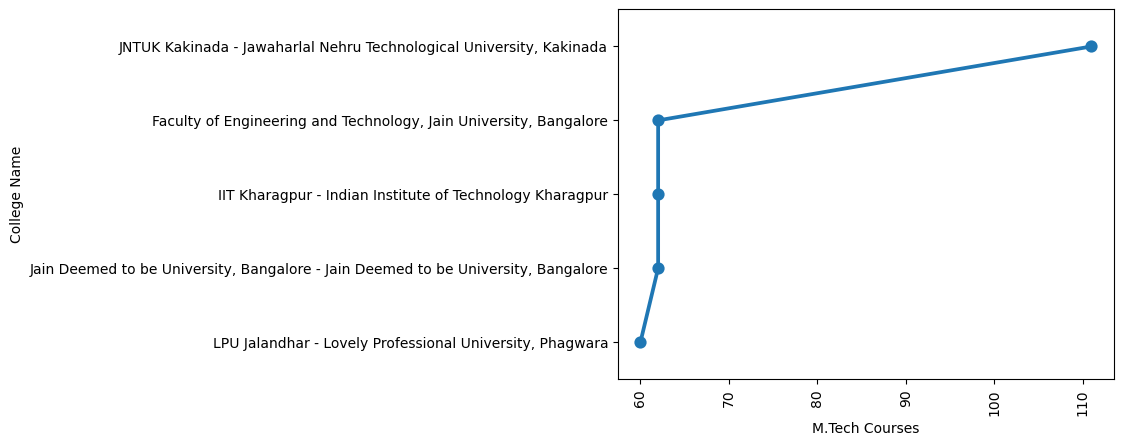

In [56]:
data = df.groupby('College Name')['M.Tech Courses'].sum().sort_values(ascending=False).reset_index()
sns.pointplot(y='College Name', x='M.Tech Courses', data=data.head(5))
plt.xticks(rotation=90)
plt.show()

# How does the M.Tech fee compare to the B.Tech fee for top 10 colleges? 

Top 10 Colleges based on NIRF Ranking:
     NIRF Ranking                                       College Name  \
300             0               Shiv Nadar University, Greater Noida   
301             0  ZHCET Aligarh - Zakir Husain College of Engine...   
302             0                       SRM University AP, Amaravati   
303             0  SET MRIIRS - School of Engineering and Technol...   
304             0  NDRI Karnal - National Dairy Research Institut...   
305             0                 Amity School of Engineering, Noida   
306             0                       VIT-AP University, Amaravati   
307             0  Faculty of Engineering and Technology, Jain Un...   
308             0     School Of Advanced Engineering, UPES, Dehradun   
309             0  Institute of Technology, Nirma University, Ahm...   

     M.Tech Fee  B.Tech Fee  
300       66836     1960000  
301       21500      222000  
302      300000     1220000  
303      917000      388500  
304       66836   

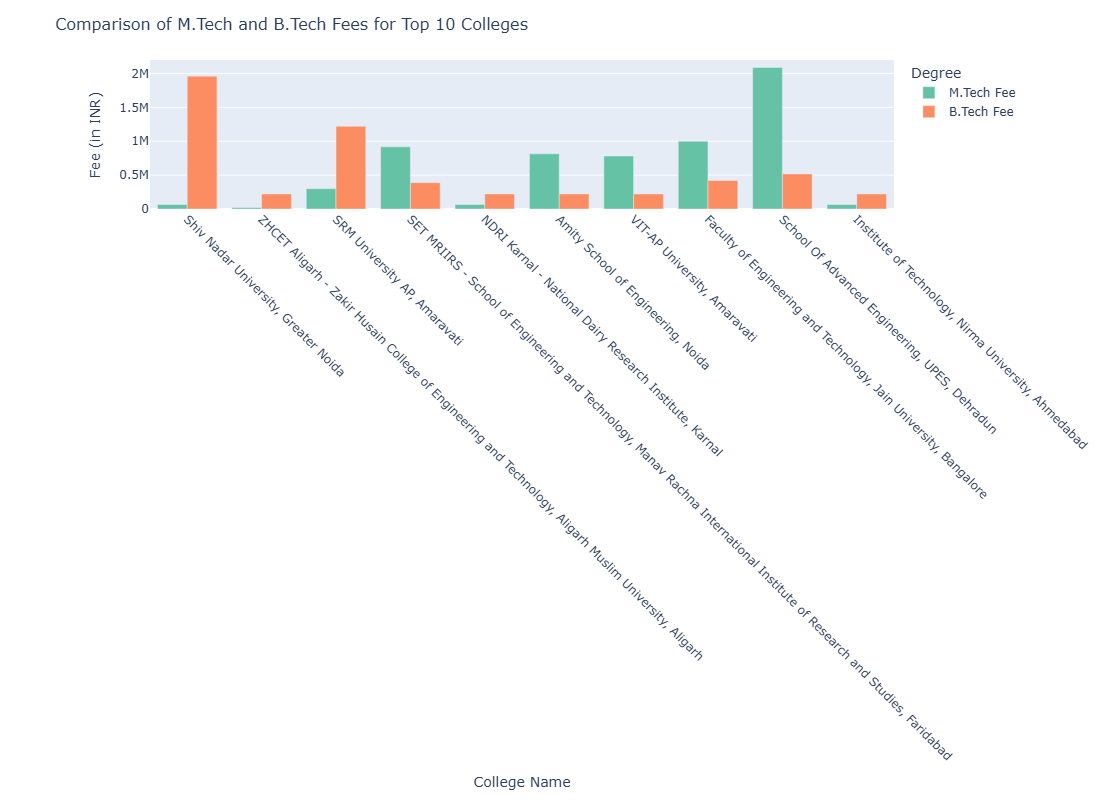

In [58]:
import pandas as pd
import plotly.express as px

# Assume the DataFrame is already loaded into 'df'

# Filter the top 10 colleges based on NIRF Ranking
top_10_colleges = df.nsmallest(10, 'NIRF Ranking')

# Display the top 10 colleges for verification
print("Top 10 Colleges based on NIRF Ranking:")
print(top_10_colleges[['NIRF Ranking', 'College Name', 'M.Tech Fee', 'B.Tech Fee']])

# Melt the DataFrame for visualization
top_10_colleges_melted = top_10_colleges.melt(
    id_vars=['College Name'],
    value_vars=['M.Tech Fee', 'B.Tech Fee'],
    var_name='Degree',
    value_name='Fee'
)

# Create a bar plot for comparison of M.Tech and B.Tech fees for the top 10 colleges
fig = px.bar(
    top_10_colleges_melted,
    x="College Name",
    y="Fee",
    color="Degree",
    barmode='group',
    title="Comparison of M.Tech and B.Tech Fees for Top 10 Colleges",
    labels={'Fee': 'Fee (in INR)', 'College Name': 'College Name'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Customize the layout
fig.update_layout(
    xaxis_tickangle=45,
    xaxis_title='College Name',
    yaxis_title='Fee (in INR)',
    title_font_size=16,
    margin=dict(l=150, r=20, t=60, b=100),
    width=900,
    height=800
)

# Show the plot
fig.show()


#  Identifying Patterns and Outliers in Fee Structures

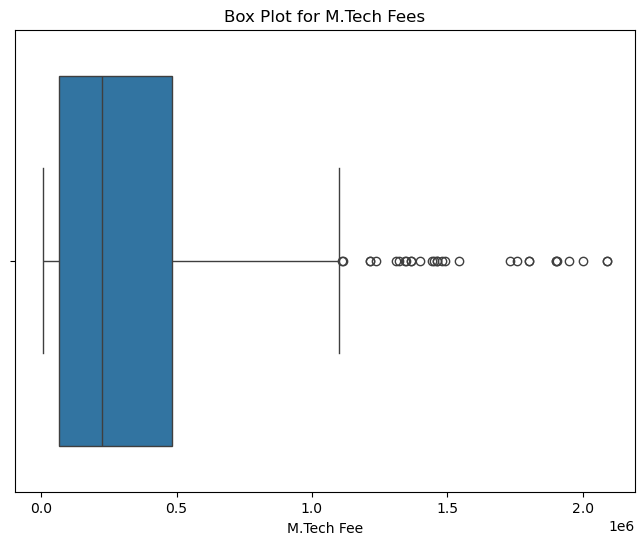

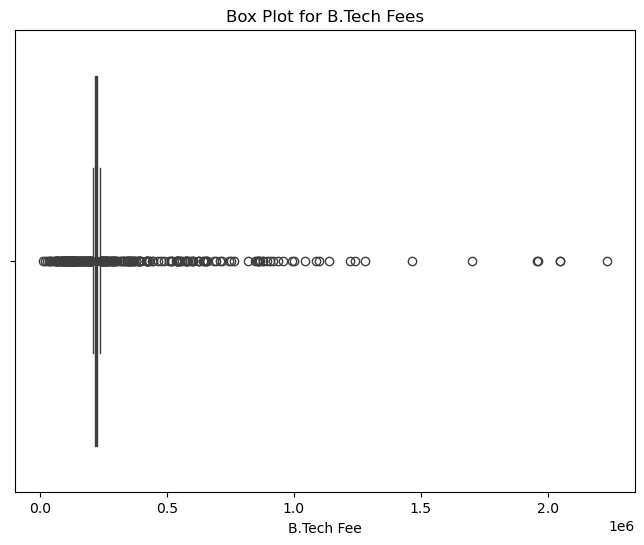

In [60]:
# Box plot for M.Tech Fee
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['M.Tech Fee'])
plt.title('Box Plot for M.Tech Fees')
plt.xlabel('M.Tech Fee')
plt.show()

# Box plot for B.Tech Fee
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['B.Tech Fee'])
plt.title('Box Plot for B.Tech Fees')
plt.xlabel('B.Tech Fee')
plt.show()


 # Analyze the Number of Brochures Taken by Each Institute

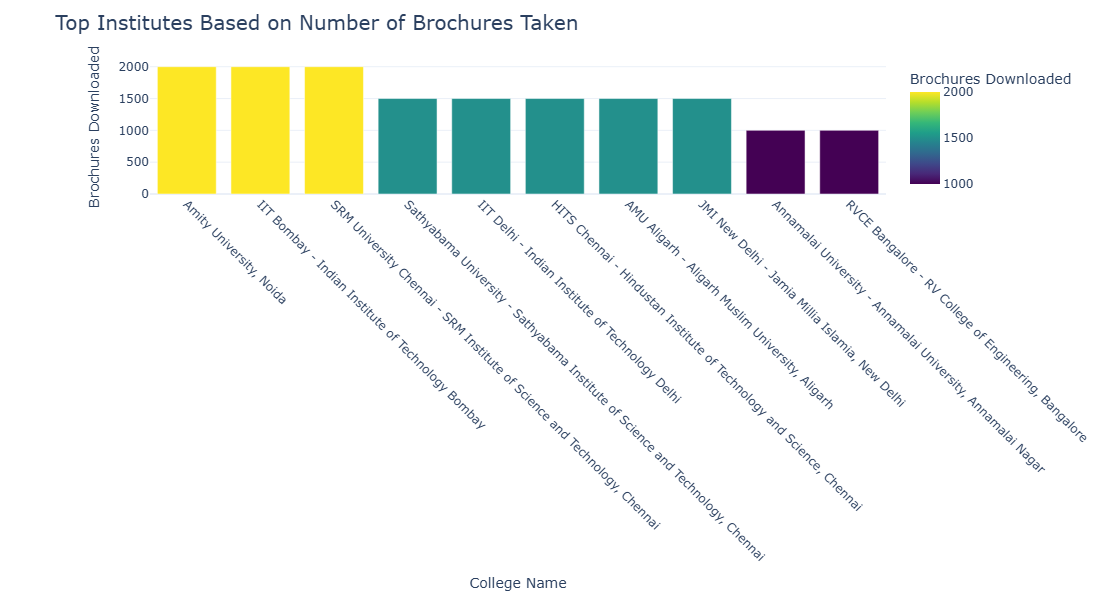

In [62]:
# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Now try the analysis again
top_brochures_institutes = df[['College Name', 'Brochures Downloaded']].sort_values(by='Brochures Downloaded', ascending=False).head(10)

# Create the plot again
fig = px.bar(
    top_brochures_institutes,
    x='College Name',  # X-axis will show College Names
    y='Brochures Downloaded',  # Y-axis will show the number of brochures downloaded
    title='Top Institutes Based on Number of Brochures Taken',
    labels={'Brochures Downloaded': 'Brochures Downloaded', 'College Name': 'College Name'},
    color='Brochures Downloaded',  # Color bars based on number of brochures taken
    color_continuous_scale='Viridis'  # You can use other color scales like 'Blues', 'Plasma', etc.
)

# Customize layout
fig.update_layout(
    title_font_size=20,
    xaxis_tickangle=45,  # Rotate x-axis labels for better readability
    xaxis_title='College Name',
    yaxis_title='Brochures Downloaded',
    template='plotly_white',
    margin=dict(l=150, r=20, t=60, b=100),  # Adjust margins for readability
    width=800,  # Set figure width
    height=600  # Set figure height
)

# Show the plot
fig.show()


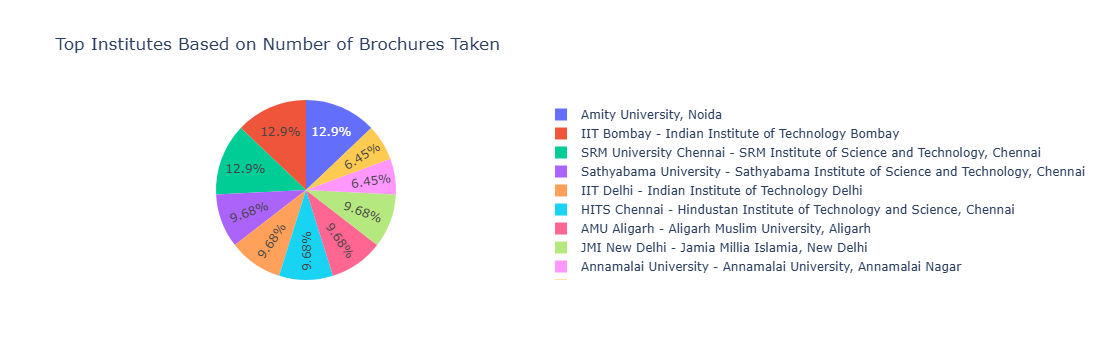

In [63]:
import plotly.express as px

# Create a pie chart for the top institutes based on brochures taken
fig = px.pie(
    top_brochures_institutes,
    names='College Name',  # Pie chart slices will represent each college
    values='Brochures Downloaded',  # The size of each slice corresponds to the number of brochures
    title='Top Institutes Based on Number of Brochures Taken'
)

# Show the pie chart
fig.show()


# Comparison of M.Tech and B.Tech Courses Across Colleges

In [65]:
# Filter the top 10 colleges based on NIRF Ranking
df_top_10 = df.nsmallest(10, 'NIRF Ranking')

In [66]:
# Melt the DataFrame for grouped bar chart
df_top_10_melted = df_top_10.melt(
    id_vars=['College Name'],  # Keep 'College Name' as is
    value_vars=['M.Tech Fee', 'B.Tech Fee'],  # Columns to be reshaped
    var_name='Degree',  # Name of the new column for M.Tech/B.Tech
    value_name='Fee'  # Name of the new column for fees
)



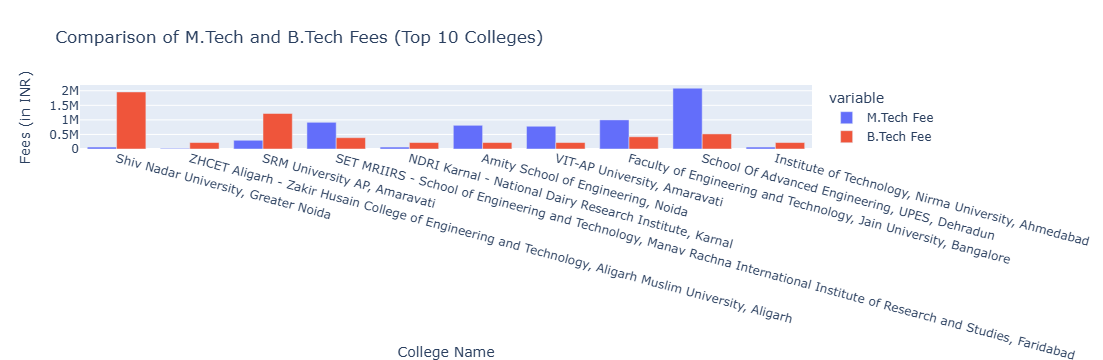

In [67]:
fig = px.bar(df_top_10, x='College Name', y=['M.Tech Fee', 'B.Tech Fee'],
             title="Comparison of M.Tech and B.Tech Fees (Top 10 Colleges)",
             labels={'value': 'Fees (in INR)', 'College Name': 'College Name'},
             barmode='group')

# Update layout for better readability
fig.update_layout(xaxis_tickangle=15, xaxis_title="College Name", yaxis_title="Fees (in INR)")
fig.show()


#  What is the distribution of M.Tech fees across colleges? 

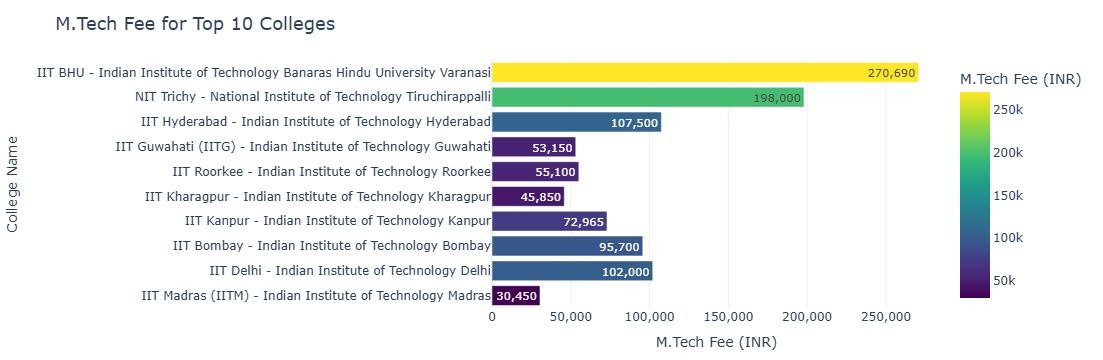

In [69]:
import plotly.express as px

# Filter the top 10 colleges based on M.Tech Fee
top_10_colleges = df.head(10)

# Create a bar chart using Plotly
fig = px.bar(
    top_10_colleges,
    x='M.Tech Fee',  # Correct column name for M.Tech Fee
    y='College Name',  # Correct column name for College Name
    orientation='h',  # Horizontal bar chart
    text='M.Tech Fee',  # Display M.Tech Fee as text
    title='M.Tech Fee for Top 10 Colleges',
    labels={'M.Tech Fee': 'M.Tech Fee (INR)', 'College Name': 'College Name'},
    color='M.Tech Fee',  # Color bars based on M.Tech Fee values
    color_continuous_scale='Viridis'
)

# Format hover data and add comma separators for fees
fig.update_traces(
    texttemplate='%{x:,.0f}',  # Format numbers with commas
    textposition='auto'
)

# Customize layout for readability
fig.update_layout(
    title_font_size=18,
    xaxis_title='M.Tech Fee (INR)',
    yaxis_title='College Name',
    xaxis=dict(tickformat=","),
    template='plotly_white',
    margin=dict(l=120, r=20, t=60, b=40)  # Adjust margins for readability
)

# Show the plot
fig.show()


# - How do **M.Tech** and **B.Tech fees** compare for the **top 10 colleges** by NIRF ranking?

In [71]:
top_10_colleges = df.sort_values('NIRF Ranking').head(10)

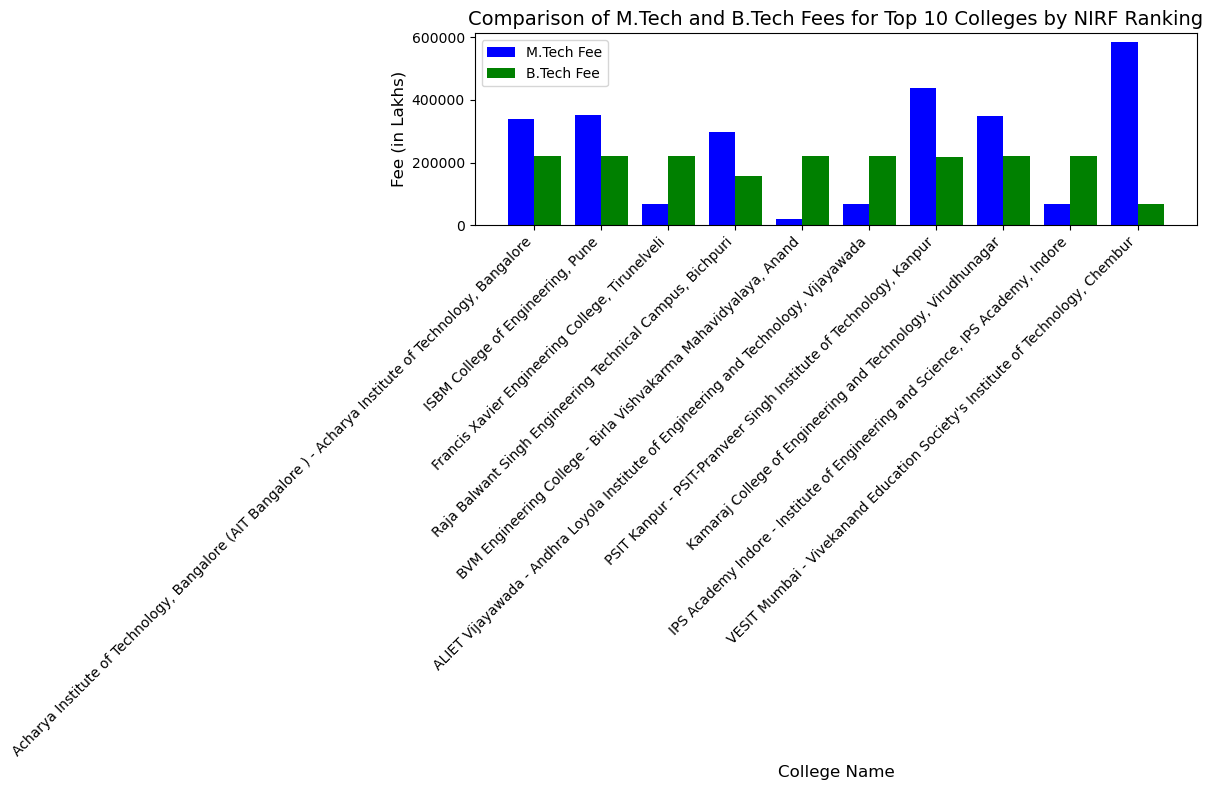

In [72]:
plt.figure(figsize=(12, 8))
x = range(len(top_10_colleges['College Name']))

# Plot M.Tech Fees
plt.bar(x, top_10_colleges['M.Tech Fee'], width=0.4, label='M.Tech Fee', color='blue', align='center')

# Plot B.Tech Fees (shifted for better visibility)
plt.bar([i + 0.4 for i in x], top_10_colleges['B.Tech Fee'], width=0.4, label='B.Tech Fee', color='green', align='center')

# Adding labels and titles
plt.xlabel('College Name', fontsize=12)
plt.ylabel('Fee (in Lakhs)', fontsize=12)
plt.title('Comparison of M.Tech and B.Tech Fees for Top 10 Colleges by NIRF Ranking', fontsize=14)
plt.xticks([i + 0.2 for i in x], top_10_colleges['College Name'], rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


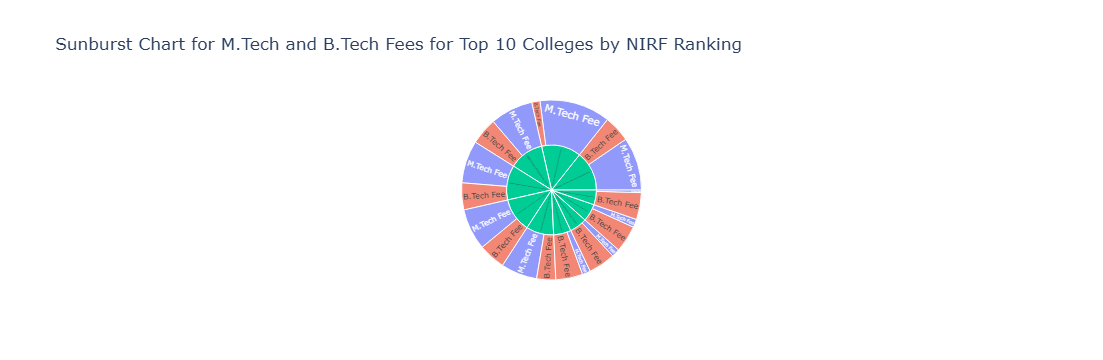

In [73]:
import plotly.express as px

# Sort and get the top 10 colleges by NIRF ranking
top_10_colleges = df.sort_values('NIRF Ranking').head(10)

# Melt the DataFrame to reshape it for the sunburst plot
top_10_colleges_melted = top_10_colleges.melt(
    id_vars=['College Name'], 
    value_vars=['M.Tech Fee', 'B.Tech Fee'], 
    var_name='Degree', 
    value_name='Fee'
)

# Create the sunburst chart
fig = px.sunburst(
    top_10_colleges_melted,
    path=["College Name", "Degree"],  # Hierarchical breakdown
    values="Fee",  # Size of the segments
    color="Degree",  # Color by Degree type (M.Tech/B.Tech)
    title="Sunburst Chart for M.Tech and B.Tech Fees for Top 10 Colleges by NIRF Ranking"
    
)

# Show the plot
fig.show()


# Which colleges have the **highest and lowest fees** for each program?

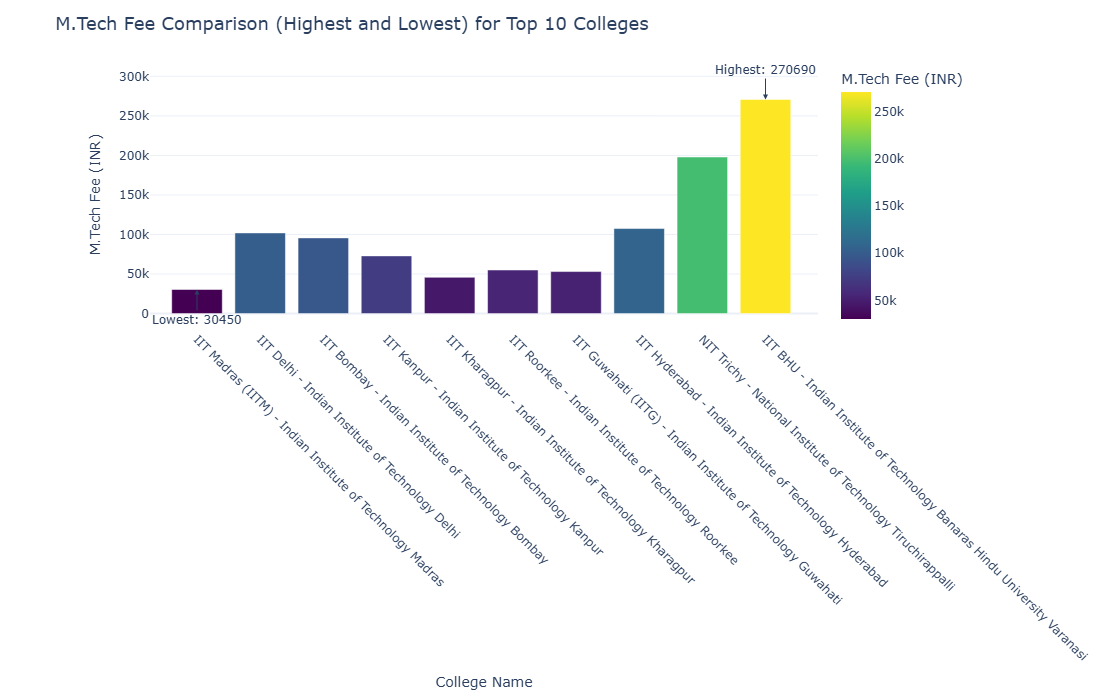

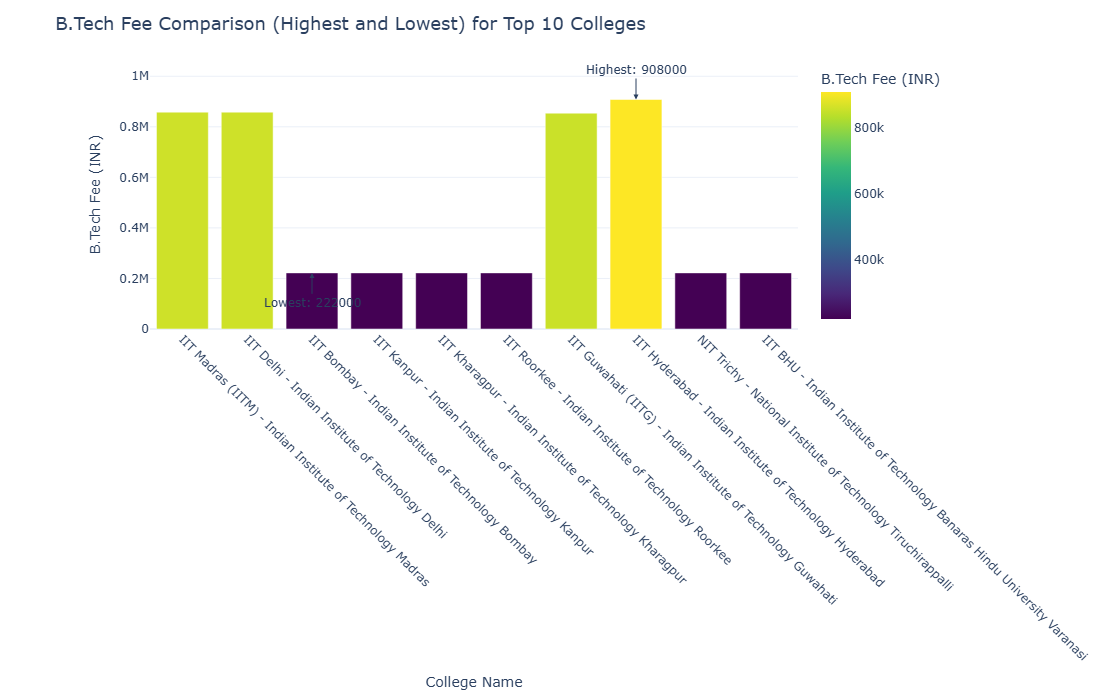

In [75]:
import plotly.express as px

# Get the top 10 colleges (first 10 rows in the DataFrame)
top_10_colleges = df.head(10)

# Sort the DataFrame to get the highest and lowest M.Tech and B.Tech fees from top 10
highest_mtech = top_10_colleges.loc[top_10_colleges['M.Tech Fee'].idxmax()]
lowest_mtech = top_10_colleges.loc[top_10_colleges['M.Tech Fee'].idxmin()]

highest_btech = top_10_colleges.loc[top_10_colleges['B.Tech Fee'].idxmax()]
lowest_btech = top_10_colleges.loc[top_10_colleges['B.Tech Fee'].idxmin()]

# --- M.Tech Fee Comparison ---
# Create a bar chart for M.Tech Fee
fig_mtech = px.bar(
    top_10_colleges,
    x='College Name',
    y='M.Tech Fee',
    title='M.Tech Fee Comparison (Highest and Lowest) for Top 10 Colleges',
    labels={'M.Tech Fee': 'M.Tech Fee (INR)', 'College Name': 'College Name'},
    color='M.Tech Fee',  # Color bars based on M.Tech Fee
    color_continuous_scale='Viridis'
)

# Add annotations for highest and lowest M.Tech Fee
fig_mtech.add_annotation(
    x=highest_mtech['College Name'], y=highest_mtech['M.Tech Fee'],
    text=f"Highest: {highest_mtech['M.Tech Fee']}",
    showarrow=True, arrowhead=2, ax=0, ay=-30
)

fig_mtech.add_annotation(
    x=lowest_mtech['College Name'], y=lowest_mtech['M.Tech Fee'],
    text=f"Lowest: {lowest_mtech['M.Tech Fee']}",
    showarrow=True, arrowhead=2, ax=0, ay=30
)

# Update layout to improve size and visibility
fig_mtech.update_layout(
    xaxis_tickangle=45,  # Rotate x-axis labels for better readability
    title_font_size=18,
    xaxis_title='College Name',
    yaxis_title='M.Tech Fee (INR)',
    template='plotly_white',
    margin=dict(l=150, r=20, t=60, b=100),  # Adjust margins for readability
    width=800,  # Set figure width
    height=700  # Set figure height
)

# --- B.Tech Fee Comparison ---
# Create a bar chart for B.Tech Fee
fig_btech = px.bar(
    top_10_colleges,
    x='College Name',
    y='B.Tech Fee',
    title='B.Tech Fee Comparison (Highest and Lowest) for Top 10 Colleges',
    labels={'B.Tech Fee': 'B.Tech Fee (INR)', 'College Name': 'College Name'},
    color='B.Tech Fee',  # Color bars based on B.Tech Fee
    color_continuous_scale='Viridis'
)

# Add annotations for highest and lowest B.Tech Fee
fig_btech.add_annotation(
    x=highest_btech['College Name'], y=highest_btech['B.Tech Fee'],
    text=f"Highest: {highest_btech['B.Tech Fee']}",
    showarrow=True, arrowhead=2, ax=0, ay=-30
)

fig_btech.add_annotation(
    x=lowest_btech['College Name'], y=lowest_btech['B.Tech Fee'],
    text=f"Lowest: {lowest_btech['B.Tech Fee']}",
    showarrow=True, arrowhead=2, ax=0, ay=30
)

# Update layout to improve size and visibility
fig_btech.update_layout(
    xaxis_tickangle=45,  # Rotate x-axis labels for better readability
    title_font_size=18,
    xaxis_title='College Name',
    yaxis_title='B.Tech Fee (INR)',
    template='plotly_white',
    margin=dict(l=150, r=20, t=60, b=100),  # Adjust margins for readability
    width=900,  # Set figure width
    height=700  # Set figure height
)

# Show the plots
fig_mtech.show()
fig_btech.show()


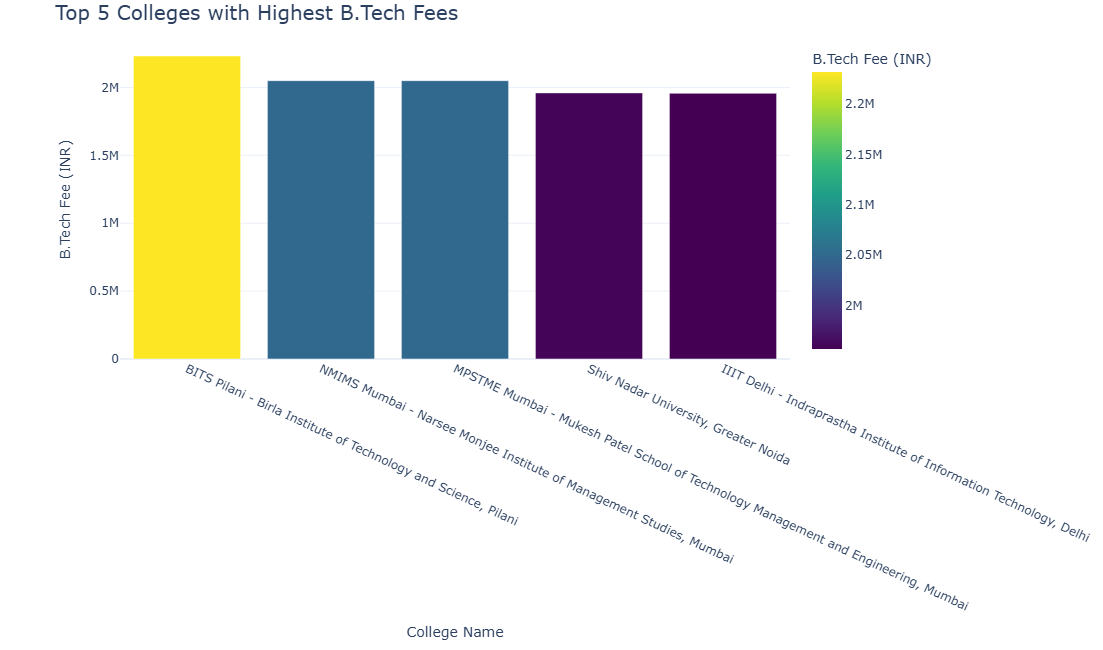

In [76]:
import plotly.express as px

# Sort the DataFrame by 'B.Tech Fee' in descending order and select the top 5 colleges
top_5_btech_colleges = df[['College Name', 'B.Tech Fee']].sort_values(by='B.Tech Fee', ascending=False).head(5)

# Create a bar chart for the top 5 B.Tech fee colleges
fig = px.bar(
    top_5_btech_colleges,
    x='College Name',
    y='B.Tech Fee',
    title='Top 5 Colleges with Highest B.Tech Fees',
    labels={'B.Tech Fee': 'B.Tech Fee (INR)', 'College Name': 'College Name'},
    color='B.Tech Fee',  # Color bars based on B.Tech Fee
    color_continuous_scale='Viridis'
)

# Update layout to make the chart more readable
fig.update_layout(
    title_font_size=20,
    xaxis_tickangle=25,  # Rotate x-axis labels for better readability
    xaxis_title='College Name',
    yaxis_title='B.Tech Fee (INR)',
    template='plotly_white',
    margin=dict(l=120, r=40, t=40, b=50),  # Adjust margins for readability
    width=800,  # Set figure width
    height=650  # Set figure height
)

# Show the plot
fig.show()


# What is the distribution of **B.Tech fees** among the top-ranked colleges?

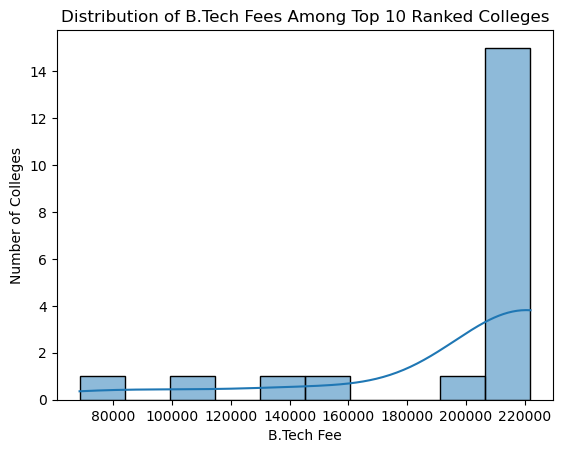

In [78]:
top_10_colleges = df.sort_values('NIRF Ranking').head(20)

# Histogram for the distribution of B.Tech fees in top 10 colleges
sns.histplot(top_10_colleges['B.Tech Fee'], kde=True, bins=10)
plt.title('Distribution of B.Tech Fees Among Top 10 Ranked Colleges')
plt.xlabel('B.Tech Fee')
plt.ylabel('Number of Colleges')
plt.show()


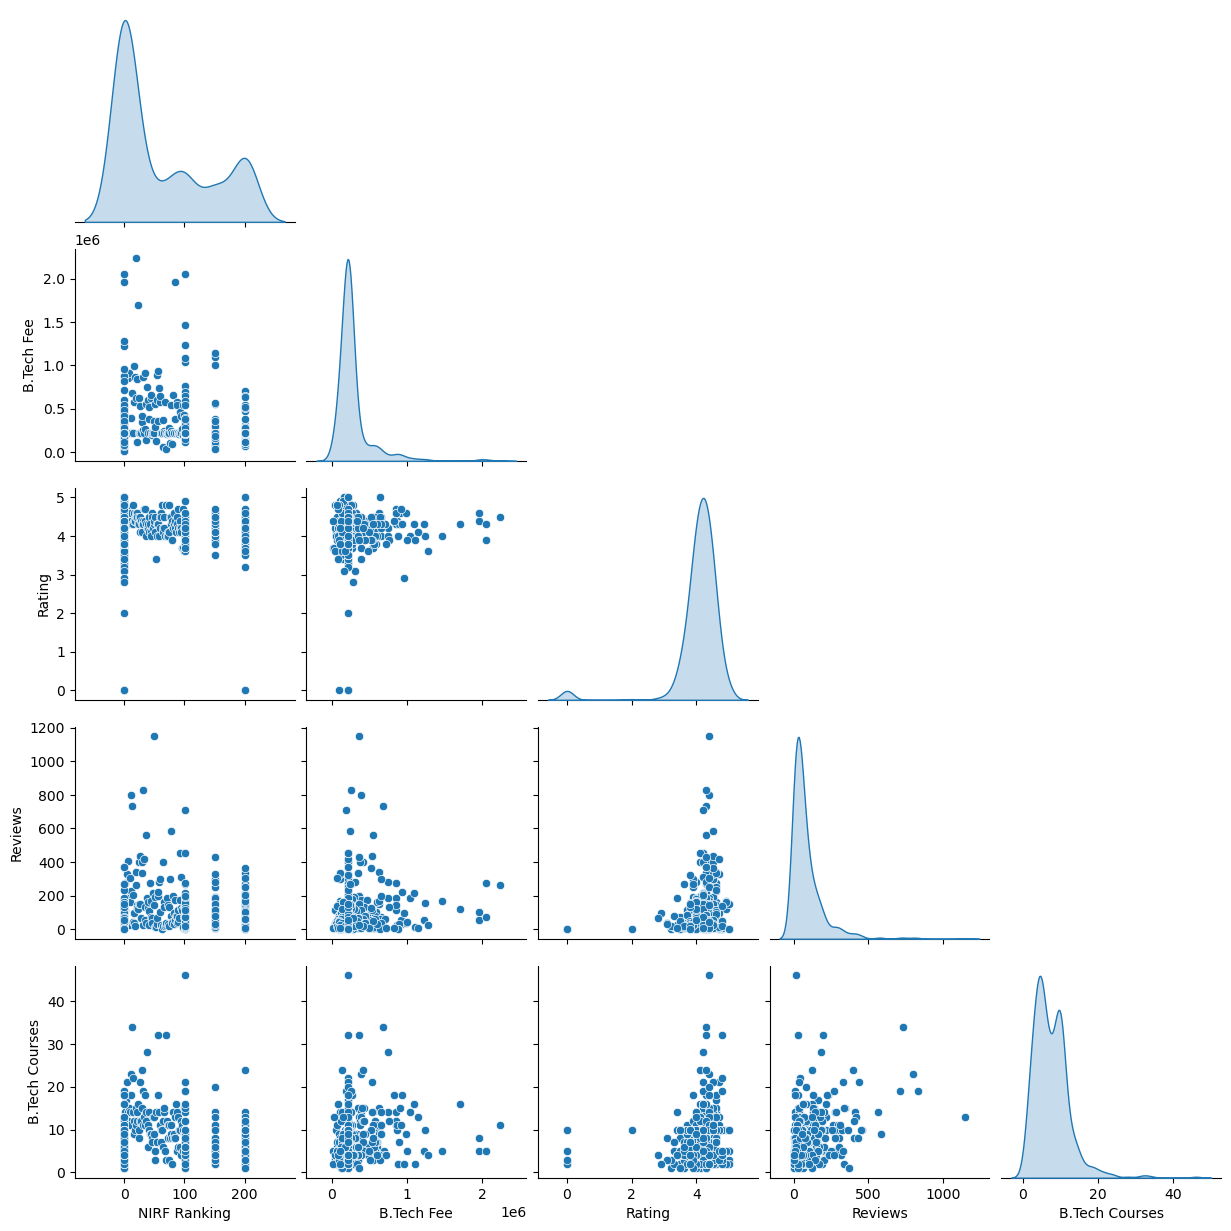

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for pairplot
numeric_columns = df[['NIRF Ranking', 'B.Tech Fee', 'Rating', 'Reviews', 'B.Tech Courses']]

# Create a pairplot to visualize relationships
sns.pairplot(numeric_columns, diag_kind='kde', corner=True)

# Show the plot
plt.show()


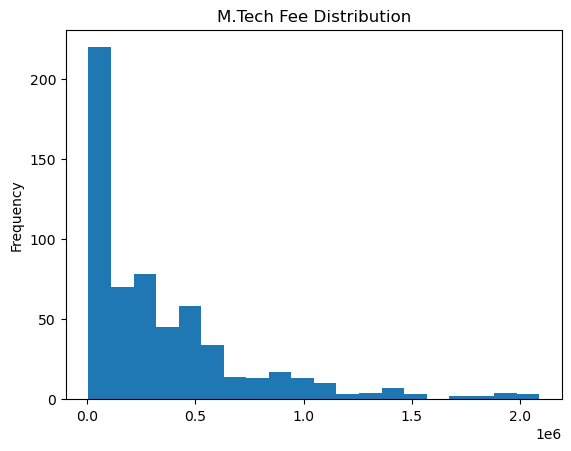

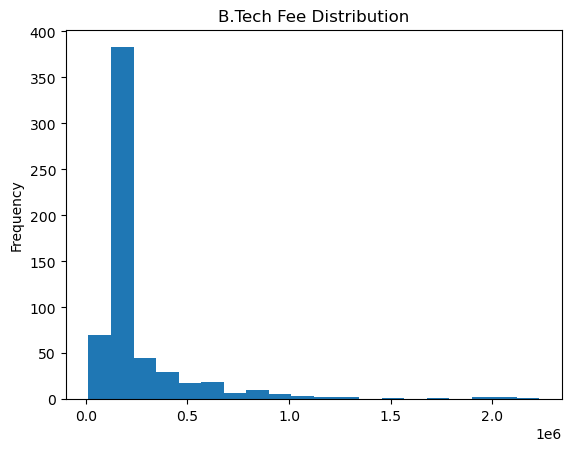

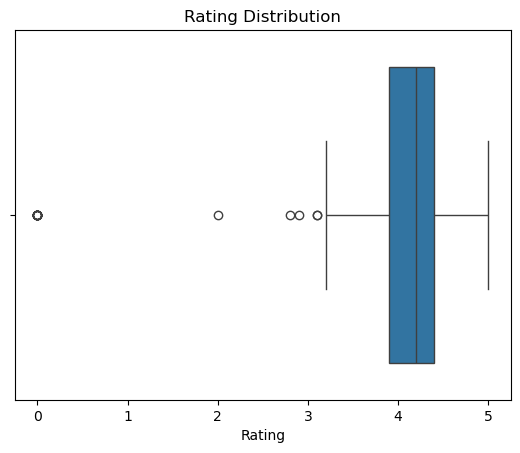

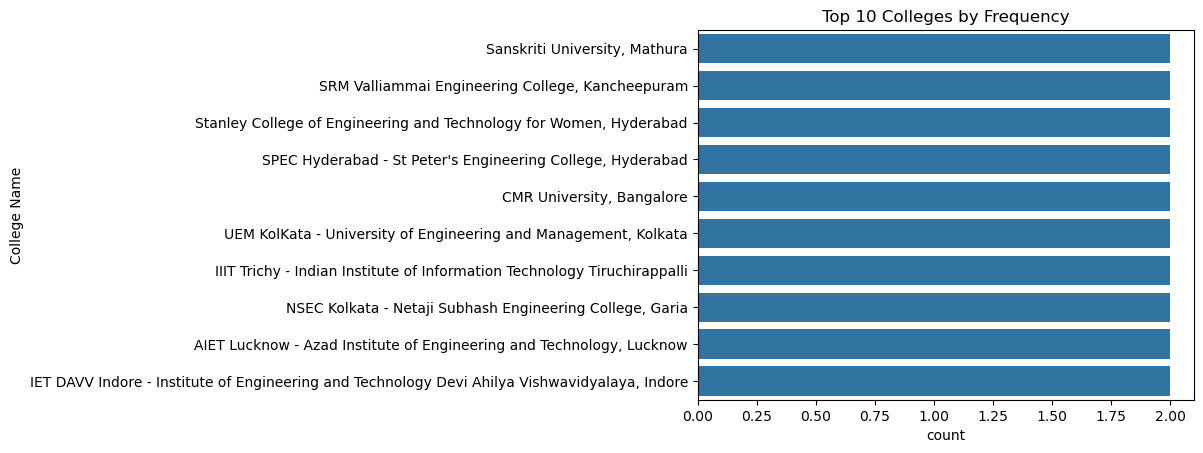

In [80]:
# Summary statistics for numerical columns
df.describe()

# Histogram for fees
df['M.Tech Fee'].plot(kind='hist', bins=20, title='M.Tech Fee Distribution')
plt.show()

df['B.Tech Fee'].plot(kind='hist', bins=20, title='B.Tech Fee Distribution')
plt.show()

# Box plot for Ratings
sns.boxplot(x='Rating', data=df)
plt.title('Rating Distribution')
plt.show()

# Count plot for colleges
sns.countplot(y='College Name', data=df, order=df['College Name'].value_counts().head(10).index)
plt.title('Top 10 Colleges by Frequency')
plt.show()


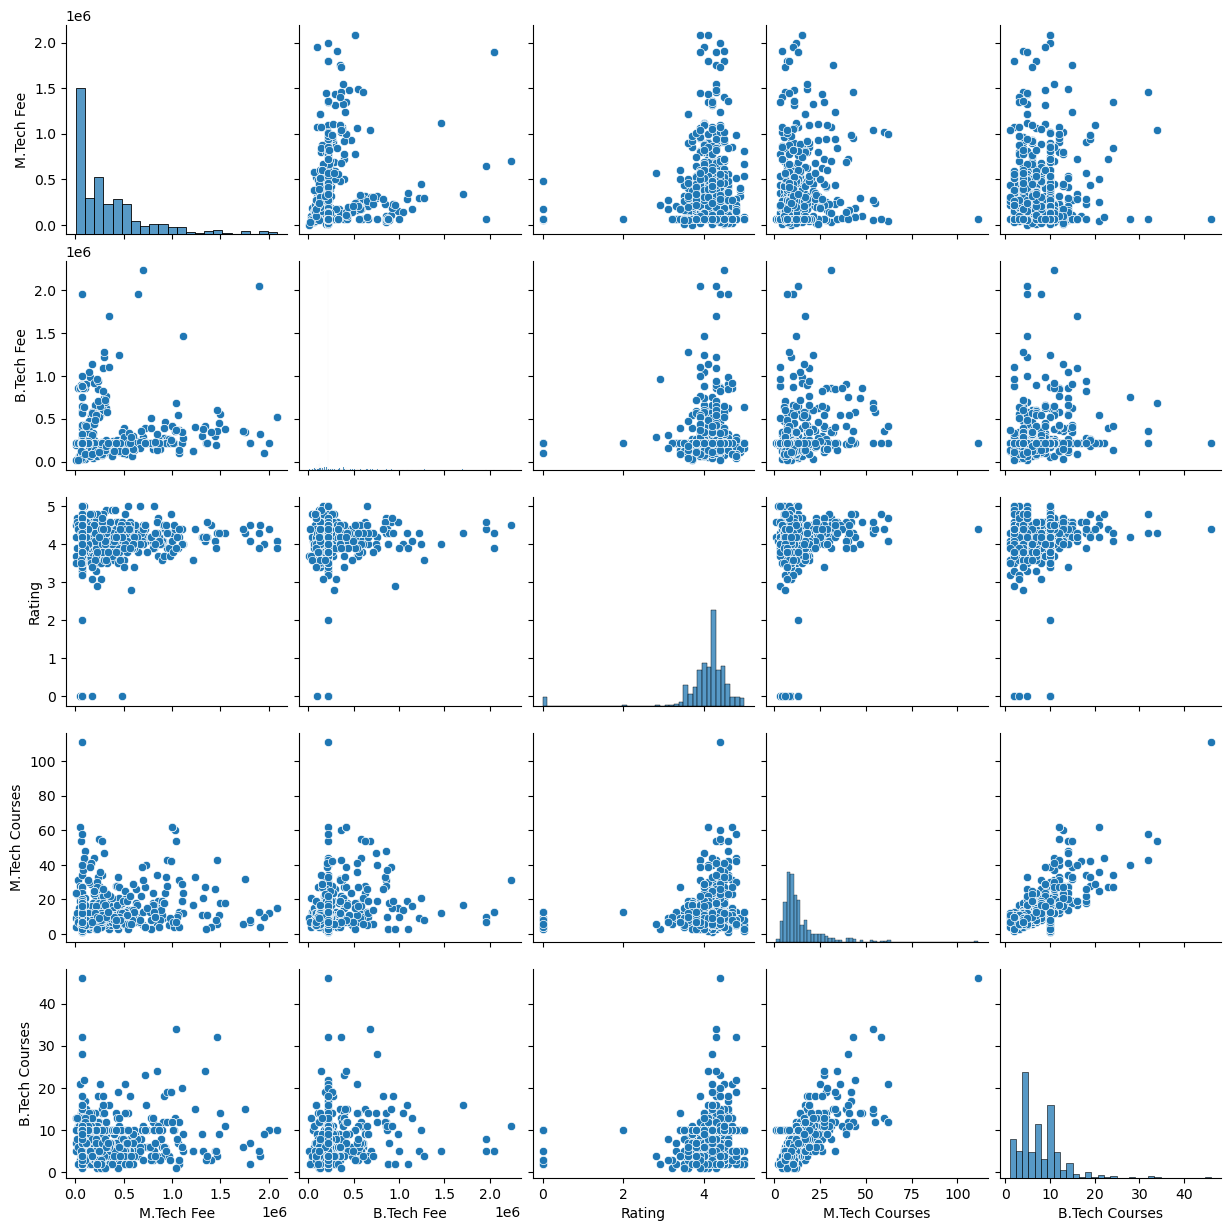

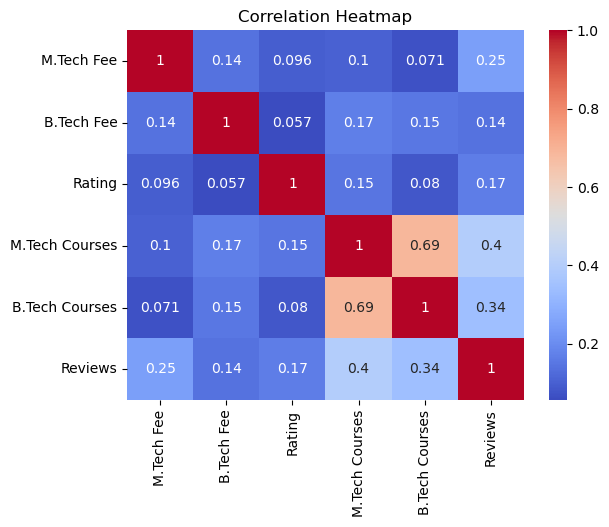

C:\Users\PRAVEEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



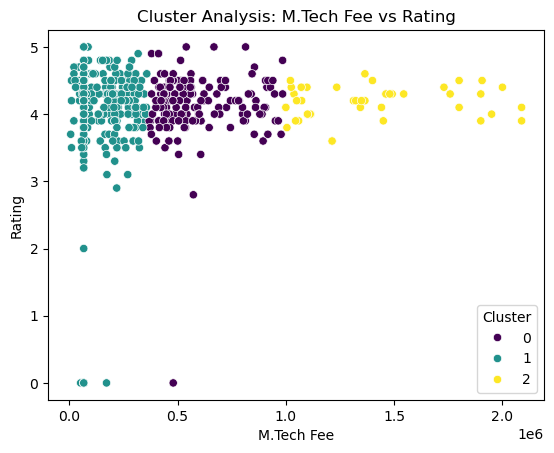

In [81]:
# Pairplot for fees, ratings, and courses
sns.pairplot(df[['M.Tech Fee', 'B.Tech Fee', 'Rating', 'M.Tech Courses', 'B.Tech Courses']])
plt.show()

# Heatmap for correlations
corr_matrix = df[['M.Tech Fee', 'B.Tech Fee', 'Rating', 'M.Tech Courses', 'B.Tech Courses', 'Reviews']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Cluster analysis (KMeans example)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['M.Tech Fee', 'Rating']].fillna(0))
sns.scatterplot(x='M.Tech Fee', y='Rating', hue='Cluster', data=df, palette='viridis')
plt.title('Cluster Analysis: M.Tech Fee vs Rating')
plt.show()


Available Colleges:
1. IIT Madras (IITM) - Indian Institute of Technology Madras
2. IIT Delhi - Indian Institute of Technology Delhi
3. IIT Bombay - Indian Institute of Technology Bombay
4. IIT Kanpur - Indian Institute of Technology Kanpur
5. IIT Kharagpur - Indian Institute of Technology Kharagpur
6. IIT Roorkee - Indian Institute of Technology Roorkee
7. IIT Guwahati (IITG) - Indian Institute of Technology Guwahati
8. IIT Hyderabad - Indian Institute of Technology Hyderabad
9. NIT Trichy - National Institute of Technology Tiruchirappalli
10. IIT BHU - Indian Institute of Technology Banaras Hindu University Varanasi
11. VIT Vellore - Vellore Institute of Technology, Vellore
12. Jadavpur University, Kolkata
13. SRM University Chennai - SRM Institute of Science and Technology, Chennai
14. Anna University, Chennai
15. IIT ISM Dhanbad - Indian Institute of Technology Indian School of Mines Dhanbad
16. IIT Indore - Indian Institute of Technology Indore
17. NIT Surathkal (NITK) - National 


Enter the name of the college (exactly as shown above):  Prakasam Engineering College, Prakasam



Selected College Details:
College Name: Prakasam Engineering College, Prakasam
M.Tech Fee: ₹172000.0
B.Tech Fee: ₹86000.0
M.Tech Courses: 7.0
B.Tech Courses: 4.0
Rating: 3.4/5
Reviews: 4


C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_19016\3823837924.py:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\PRAVEEN\AppData\Local\Temp\ipykernel_19016\3823837924.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




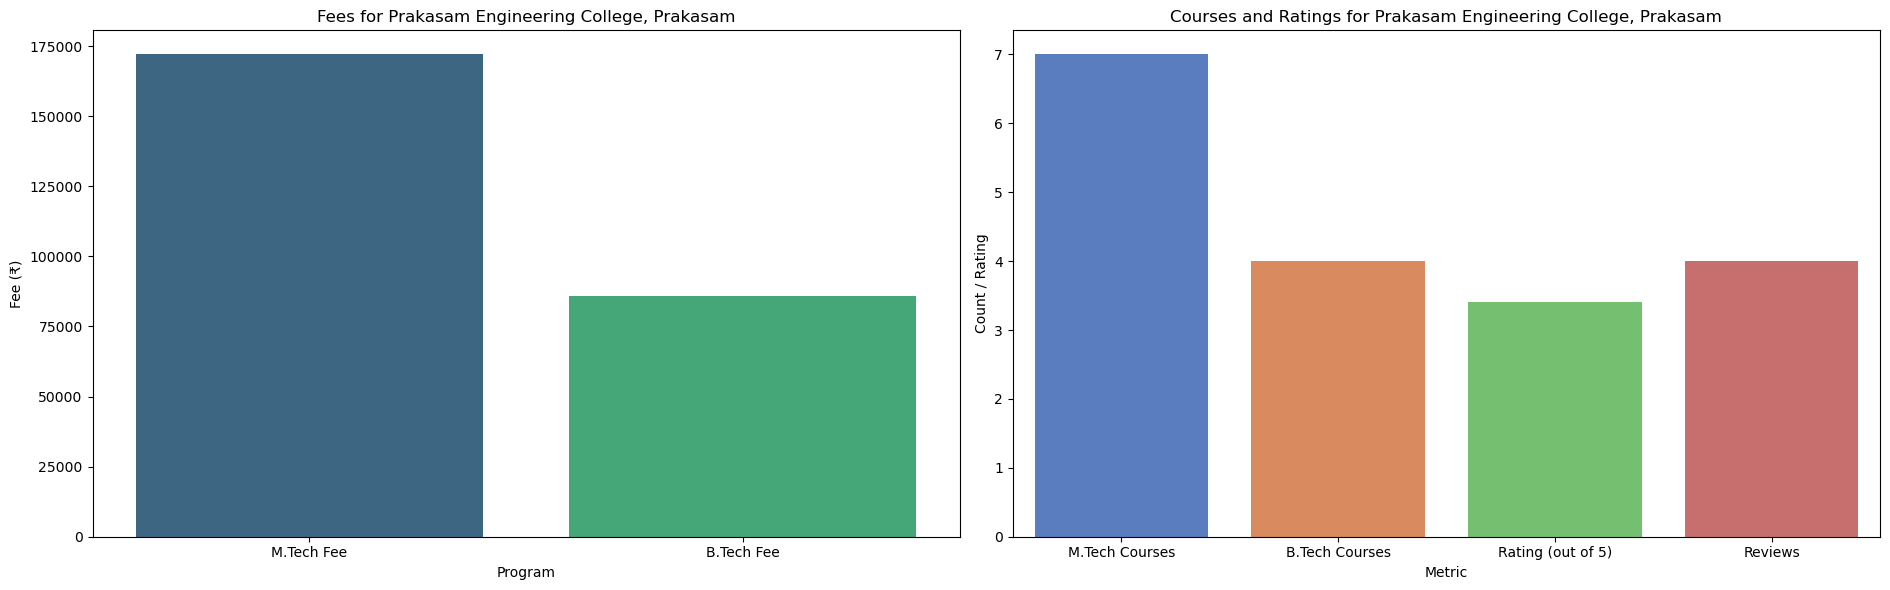

In [82]:


# Load the scraped data from CSV
df = pd.read_csv("college_ranking_data.csv")

# Function to display college details and visualization
def display_college_data():
    # Display the list of colleges for user selection
    print("Available Colleges:")
    for idx, college in enumerate(df["College Name"], 1):
        print(f"{idx}. {college}")

    # User input for college selection
    college_name = input("\nEnter the name of the college (exactly as shown above): ")
    if college_name not in df["College Name"].values:
        print("College not found. Please check the name and try again.")
        return

    # Filter the data for the selected college
    college_data = df[df["College Name"] == college_name].iloc[0]

    # Extract relevant details
    mtech_fee = college_data["M.Tech Fee"]
    btech_fee = college_data["B.Tech Fee"]
    mtech_courses = college_data["M.Tech Courses"]
    btech_courses = college_data["B.Tech Courses"]
    rating = college_data["Rating"]
    reviews = college_data["Reviews"]

    # Print details
    print("\nSelected College Details:")
    print(f"College Name: {college_name}")
    print(f"M.Tech Fee: ₹{mtech_fee}")
    print(f"B.Tech Fee: ₹{btech_fee}")
    print(f"M.Tech Courses: {mtech_courses}")
    print(f"B.Tech Courses: {btech_courses}")
    print(f"Rating: {rating}/5")
    print(f"Reviews: {reviews}")

    # Visualization
    plt.figure(figsize=(19, 6))
    
    # Subplot for Fees
    plt.subplot(1, 2, 1)
    sns.barplot(x=["M.Tech Fee", "B.Tech Fee"], y=[mtech_fee, btech_fee], palette="viridis")
    plt.title(f"Fees for {college_name}")
    plt.ylabel("Fee (₹)")
    plt.xlabel("Program")

    # Subplot for Courses and Ratings
    plt.subplot(1, 2, 2)
    sns.barplot(
        x=["M.Tech Courses", "B.Tech Courses", "Rating (out of 5)", "Reviews"],
        y=[mtech_courses, btech_courses, rating, reviews],
        palette="muted"
    )
    plt.title(f"Courses and Ratings for {college_name}")
    plt.ylabel("Count / Rating")
    plt.xlabel("Metric")

    plt.tight_layout()
    plt.show()

# Call the function to display data
display_college_data()


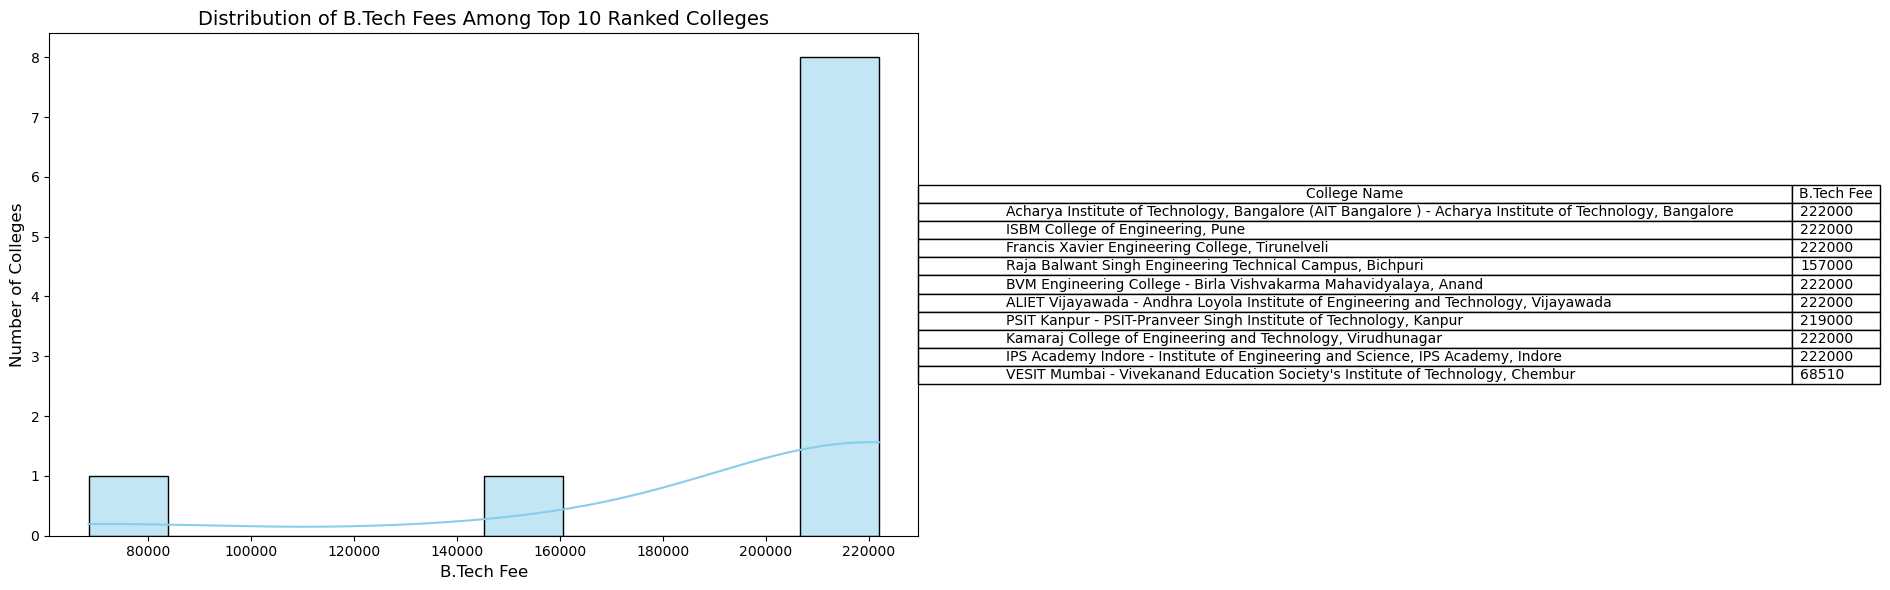

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `top_10_colleges` DataFrame is already available
# Filter to include only the top 10 colleges
top_10_colleges = top_10_colleges.head(10)

# Prepare the data for plotting and table
data = {'College Name': top_10_colleges['College Name'], 'B.Tech Fee': top_10_colleges['B.Tech Fee']}
df = pd.DataFrame(data)

# Create the histogram
plt.figure(figsize=(19, 6))
sns.histplot(top_10_colleges['B.Tech Fee'], kde=True, bins=10, color='skyblue')

# Add title and axis labels
plt.title('Distribution of B.Tech Fees Among Top 10 Ranked Colleges', fontsize=14)
plt.xlabel('B.Tech Fee', fontsize=12)
plt.ylabel('Number of Colleges', fontsize=12)

# Adjust the right margin to make space for the table
plt.subplots_adjust(right=0.65)

# Add a table showing college names and fees
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  cellLoc='left',
                  loc='right',
                  colWidths=[0.4, 0.3])  # Adjust column widths

# Customize the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1])  # Ensure proper column width adjustment

plt.tight_layout()
plt.show()
